In [356]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.font_manager

In [357]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")



In [358]:
print(df2.info())
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB
None
<class 'pandas

In [359]:
df1.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [360]:

df2.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
count,21805.000000,21805.000000,21805.000000,21805.000000,13202.000000,21805.000000,21805.000000
mean,61785.000000,1748.737491,44.877734,42.748085,2.440085,15.138363,14220.306581
std,6294.705646,1438.358949,17.254898,17.269112,1.037627,6.302805,6497.996164
min,50883.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2152.000000
25%,56334.000000,535.000000,28.000000,27.000000,1.000000,12.000000,9285.000000
50%,61785.000000,1392.000000,44.000000,41.000000,3.000000,17.000000,13244.000000
75%,67236.000000,2712.000000,59.000000,57.000000,3.000000,20.000000,18201.600000
max,72687.000000,6185.000000,75.000000,75.000000,4.000000,22.000000,43776.000000


In [361]:
print(df1.isnull().sum())

df2.isnull().sum()


ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64


ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [362]:
print(df1.dtypes)
print(df2.dtypes)

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object
ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
dtype: object


In [363]:
df1.head(40)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1


In [364]:
df2.head(15)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0
5,50888,C1,1329,Rented,Individual,24,24,No,X2,NaN,NaN,18,6150.0
6,50889,C2,3479,Owned,Individual,56,56,No,X5,14+,4.0,17,19152.0
7,50890,C13,396,Rented,Individual,41,41,No,NaN,NaN,NaN,16,11034.0
8,50891,C18,513,Owned,Individual,22,22,No,X3,NaN,NaN,22,10784.0
9,50892,C3,957,Owned,Joint,41,37,Yes,X5,6.0,1.0,22,16934.4


In [366]:
df1['Region_Code'].unique()

array([3213, 1117, 3732, ..., 5326, 6149, 5450])

In [368]:

f=df1.groupby(["Region_Code"]).count()
f.head(20)

,ID,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Region_Code,,,,,,,,,,,,,
1,96,96,96,96,96,96,96,70,61,61,96,96,96
2,73,73,73,73,73,73,73,59,40,40,73,73,73
4,73,73,73,73,73,73,73,57,54,54,73,73,73
5,75,75,75,75,75,75,75,47,60,60,75,75,75
6,73,73,73,73,73,73,73,53,48,48,73,73,73
7,64,64,64,64,64,64,64,53,41,41,64,64,64
8,64,64,64,64,64,64,64,48,43,43,64,64,64
10,69,69,69,69,69,69,69,55,46,46,69,69,69
13,54,54,54,54,54,54,54,42,31,31,54,54,54


In [350]:
df2.groupby(['Health Indicator']).count()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
Health Indicator,,,,,,,,,,,,
X1,5614,5614,5614,5614,5614,5614,5614,5614,3334,3334,5614,5614
X2,4516,4516,4516,4516,4516,4516,4516,4516,2763,2763,4516,4516
X3,2846,2846,2846,2846,2846,2846,2846,2846,1675,1675,2846,2846
X4,2442,2442,2442,2442,2442,2442,2442,2442,1542,1542,2442,2442
X5,681,681,681,681,681,681,681,681,439,439,681,681
X6,514,514,514,514,514,514,514,514,310,310,514,514
X7,96,96,96,96,96,96,96,96,65,65,96,96
X8,41,41,41,41,41,41,41,41,22,22,41,41
X9,28,28,28,28,28,28,28,28,20,20,28,28


In [ ]:
!pip install pyod

In [ ]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.utils.data import generate_data, get_outliers_inliers

In [351]:
df1['Holding_Policy_Duration'] = df1['Holding_Policy_Duration'].replace(to_replace = '14+', value  ="16")
df1['Holding_Policy_Duration'] =df1['Holding_Policy_Duration'].apply(pd.to_numeric)


df2['Holding_Policy_Duration'] = df2['Holding_Policy_Duration'].replace(to_replace = '14+', value  ="16")
df2['Holding_Policy_Duration'] =df2['Holding_Policy_Duration'].apply(pd.to_numeric)

In [352]:
df1.skew()

ID                         0.000000
Region_Code                0.798096
Upper_Age                  0.217370
Lower_Age                  0.330594
Holding_Policy_Duration    0.866717
Holding_Policy_Type       -0.198895
Reco_Policy_Cat           -0.928224
Reco_Policy_Premium        0.782463
Response                   1.217936
dtype: float64

In [107]:
df1.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration    float64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [94]:
df1.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

TypeError: ignored

In [119]:
# simple imputer to filling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit_transform(df1[["Holding_Policy_Duration","Holding_Policy_Type"]])

df1[["Holding_Policy_Duration","Holding_Policy_Type"]] = imputer.transform(df1[["Holding_Policy_Duration","Holding_Policy_Type"]])

df2[["Holding_Policy_Duration","Holding_Policy_Type"]] = imputer.transform(df2[["Holding_Policy_Duration","Holding_Policy_Type"]])

In [44]:
df1['Holding_Policy_Duration'] = df1['Holding_Policy_Duration'].interpolate()
df1['Holding_Policy_Type'] = df1['Holding_Policy_Type'].interpolate()


df2['Holding_Policy_Duration'] = df2['Holding_Policy_Duration'].interpolate()
df2['Holding_Policy_Type'] = df2['Holding_Policy_Type'].interpolate()



In [120]:
print(df1.isnull().sum())
print(df2.isnull().sum())
df1['Holding_Policy_Duration'].head(10)

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64
ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64


0    16.0
1     5.0
2     1.0
3    16.0
4     3.0
5     5.0
6     5.0
7     9.0
8    14.0
9     7.0
Name: Holding_Policy_Duration, dtype: float64

In [104]:
df1["Health Indicator"] = df1['Health Indicator'].fillna('X0')
df2["Health Indicator"] = df2['Health Indicator'].fillna('X0')

In [ ]:
df1["Health Indicator"] = df1['Health Indicator'].fillna('X0')
df1['Holding_Policy_Duration']  =df1['Holding_Policy_Duration'].fillna(0)
df1['Holding_Policy_Type'] = df1['Holding_Policy_Type'].fillna(0)
df1['Holding_Policy_Duration'] = df1['Holding_Policy_Duration'].replace(to_replace = '14+', value  ="16")
df1['Holding_Policy_Duration'] =df1['Holding_Policy_Duration'].apply(pd.to_numeric)
print(df1.isnull().sum())

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64


In [47]:
print(df1.isnull().sum())

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64


No use for now


In [ ]:
df2["Health Indicator"] = df2['Health Indicator'].fillna('X0')
df2['Holding_Policy_Duration']  =df2['Holding_Policy_Duration'].fillna(0)
df2['Holding_Policy_Type'] = df2['Holding_Policy_Type'].fillna(0)
df2['Holding_Policy_Duration'] = df2['Holding_Policy_Duration'].replace(to_replace = '14+', value  ="16")
df2['Holding_Policy_Duration'] =df2['Holding_Policy_Duration'].apply(pd.to_numeric)
print(df2.isnull().sum())

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64


In [121]:
y=df1["Response"]
df1=df1.drop(["ID","Response"],axis=1)

In [122]:
df_f = df2["ID"]
df2=df2.drop(["ID"],axis=1)


In [123]:
df1.skew()

Region_Code                0.798096
Upper_Age                  0.217370
Lower_Age                  0.330594
Holding_Policy_Duration    1.454396
Holding_Policy_Type       -0.912864
Reco_Policy_Cat           -0.928224
Reco_Policy_Premium        0.782463
dtype: float64

In [124]:
df2.skew()

Region_Code                0.789132
Upper_Age                  0.207386
Lower_Age                  0.326725
Holding_Policy_Duration    1.448697
Holding_Policy_Type       -0.878830
Reco_Policy_Cat           -0.926143
Reco_Policy_Premium        0.744149
dtype: float64

In [126]:
d={}
for i in df1['Health Indicator']:
  if i in d.keys():
    d[i]+=1
  else:
    d[i] = 1
a=["X10",'X1', 'X2', 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9']

for i in range(1,len(a)+1):
  df1['Health Indicator'] = df1['Health Indicator'].replace(to_replace =a[i] , value  = i)
  df2['Health Indicator'] = df2['Health Indicator'].replace(to_replace =a[i] , value  = i)



In [125]:

b = ["C"+str(i) for i in range(1,37)]
for i in range(len(b)):
  df1['City_Code'] = df1['City_Code'].replace(to_replace =b[i] , value  = i)
  df2['City_Code'] = df2['City_Code'].replace(to_replace =b[i] , value  = i)

df1['Health Indicator'].head(10)

0    X1
1    X2
2    X0
3    X1
4    X2
5    X2
6    X0
7    X4
8    X1
9    X0
Name: Health Indicator, dtype: object

In [127]:
df1.skew()

City_Code                  1.212203
Region_Code                0.798096
Upper_Age                  0.217370
Lower_Age                  0.330594
Health Indicator           0.868183
Holding_Policy_Duration    1.454396
Holding_Policy_Type       -0.912864
Reco_Policy_Cat           -0.928224
Reco_Policy_Premium        0.782463
dtype: float64

In [ ]:
df1['Health Indicator'] = df1['Health Indicator'].interpolate(method="akima")
df2['Health Indicator'] = df2['Health Indicator'].interpolate(method  = "akima")

In [128]:
print(df1.isnull().sum())

City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64


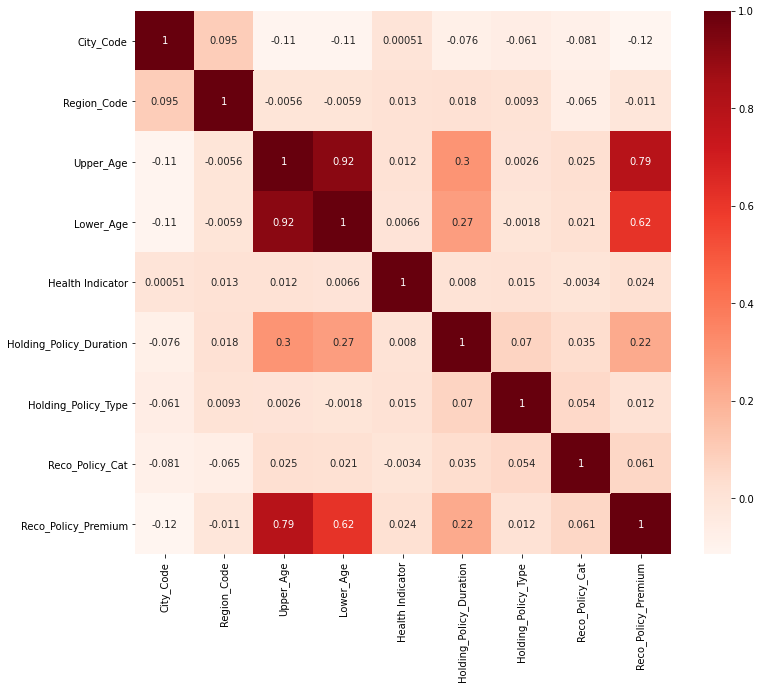

In [129]:
plt.figure(figsize=(12,10))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [130]:
print(df1.dtypes)
print(df2.dtypes)
df1.columns

City_Code                    int64
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator             int64
Holding_Policy_Duration    float64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
dtype: object
City_Code                    int64
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator             int64
Holding_Policy_Duration    float64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
dtype: object


Index(['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium'],
      dtype='object')

In [39]:
df2["Health Indicator"]  =df2["Health Indicator"].fillna(1)

In [131]:
neg, pos = np.bincount(y)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 50882
    Positive: 12209 (23.99% of total)



In [132]:
df1.skew()

City_Code                  1.212203
Region_Code                0.798096
Upper_Age                  0.217370
Lower_Age                  0.330594
Health Indicator           0.868183
Holding_Policy_Duration    1.454396
Holding_Policy_Type       -0.912864
Reco_Policy_Cat           -0.928224
Reco_Policy_Premium        0.782463
dtype: float64

In [337]:
cleaned_df = df1.copy()

# You don't want the `Time` column.
#cleaned_df.pop('ID')

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log_Reco_Policy_Premium'] = np.log(cleaned_df.pop('Reco_Policy_Premium')+eps)
cleaned_df['Log_City_Code'] = np.log(cleaned_df.pop('City_Code')+eps)
cleaned_df['Log_Health Indicator'] = np.log(cleaned_df.pop('Health Indicator')+eps)
cleaned_df['Log_Holding_Policy_Type'] = np.log(cleaned_df.pop('Holding_Policy_Type')+eps)
cleaned_df['Log_Reco_Policy_Cat'] = np.log(cleaned_df.pop('Reco_Policy_Cat')+eps)


TypeError: ignored

In [138]:
cleaned_df2 = df2.copy()
eps = 0.001 # 0 => 0.1¢
cleaned_df2['Log_Reco_Policy_Premium'] = np.log(cleaned_df2.pop('Reco_Policy_Premium')+eps)
cleaned_df2['Log_City_Code'] = np.log(cleaned_df2.pop('City_Code')+eps)
cleaned_df2['Log_Health Indicator'] = np.log(cleaned_df2.pop('Health Indicator')+eps)
cleaned_df2['Log_Holding_Policy_Type'] = np.log(cleaned_df2.pop('Holding_Policy_Type')+eps)
cleaned_df2['Log_Reco_Policy_Cat'] = np.log(cleaned_df2.pop('Reco_Policy_Cat')+eps)


In [139]:
cleaned_df2.head()

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Log_Reco_Policy_Premium,Log_City_Code,Log_Health Indicator,Log_Holding_Policy_Type,Log_Reco_Policy_Cat
0,156,Owned,Individual,30,30,No,6.0,9.387147,-6.907755,-6.907755,1.098946,1.609638
1,7,Owned,Joint,69,68,Yes,3.0,10.379871,1.098946,0.001000,1.098946,2.890427
2,564,Rented,Individual,28,28,No,2.0,9.131297,-6.907755,1.386544,1.386544,2.833272
3,1177,Rented,Individual,23,23,No,3.0,9.114490,0.693647,1.386544,1.098946,2.890427
4,951,Owned,Individual,75,75,No,5.0,10.022781,-6.907755,1.386544,1.098946,1.609638


In [137]:
cleaned_df.head()

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Log_Reco_Policy_Premium,Log_City_Code,Log_Health Indicator,Log_Holding_Policy_Type,Log_Reco_Policy_Cat
0,3213,Rented,Individual,36,36,No,16.0,9.361171,0.693647,0.001000,1.098946,3.091088
1,1117,Owned,Joint,75,22,No,5.0,10.325810,1.386544,0.693647,1.098946,3.091088
2,3732,Owned,Individual,32,32,No,1.0,8.915969,1.386544,-6.907755,0.001000,2.944492
3,4378,Owned,Joint,52,48,No,16.0,9.785830,3.135538,0.001000,1.098946,2.944492
4,2190,Rented,Individual,44,44,No,3.0,9.249946,1.946053,0.693647,0.001000,2.772651


In [58]:
y=df1["Response"]
df1=df1.drop(["ID","Response"],axis=1)
df_f = df2["ID"]
df2=df2.drop(["ID"],axis=1)


In [274]:
#dealing with categorical variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,5])], remainder='passthrough')
X = np.array(ct.fit_transform(cleaned_df))
X_11=X
X_t = np.array(ct.transform(cleaned_df2))

In [284]:
x_test =pd.DataFrame(X_t)

x_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.0,1.0,0.0,1.0,0.0,156.0,30.0,30.0,6.0,9.387147,-6.907755,-6.907755,1.098946,1.609638
1,1.0,0.0,0.0,1.0,0.0,1.0,7.0,69.0,68.0,3.0,10.379871,1.098946,0.001000,1.098946,2.890427
2,0.0,1.0,1.0,0.0,1.0,0.0,564.0,28.0,28.0,2.0,9.131297,-6.907755,1.386544,1.386544,2.833272
3,0.0,1.0,1.0,0.0,1.0,0.0,1177.0,23.0,23.0,3.0,9.114490,0.693647,1.386544,1.098946,2.890427
4,1.0,0.0,1.0,0.0,1.0,0.0,951.0,75.0,75.0,5.0,10.022781,-6.907755,1.386544,1.098946,1.609638


In [285]:
x_test = x_test.drop(columns=[1,3,5])

In [286]:
x_train = pd.DataFrame(X)
x_train = x_train.drop(columns=[1,3,5])
x_train.head()

,0,2,4,6,7,8,9,10,11,12,13,14
0,0.0,1.0,1.0,3213.0,36.0,36.0,16.0,9.361171,0.693647,0.001000,1.098946,3.091088
1,1.0,0.0,1.0,1117.0,75.0,22.0,5.0,10.325810,1.386544,0.693647,1.098946,3.091088
2,1.0,1.0,1.0,3732.0,32.0,32.0,1.0,8.915969,1.386544,-6.907755,0.001000,2.944492
3,1.0,0.0,1.0,4378.0,52.0,48.0,16.0,9.785830,3.135538,0.001000,1.098946,2.944492
4,0.0,1.0,1.0,2190.0,44.0,44.0,3.0,9.249946,1.946053,0.693647,0.001000,2.772651


In [287]:
train_df, test_df, train_labels, test_labels = train_test_split(x_train,y, test_size=0.1)
train_df, val_df, train_labels, val_labels = train_test_split(train_df,train_labels,test_size=0.1)

# Form np arrays of labels and features.

bool_train_labels = train_labels != 0

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [289]:
train_df[1:3]

,0,2,4,6,7,8,9,10,11,12,13,14
7214,0.0,1.0,1.0,763.0,19.0,19.0,5.0,8.213382,3.091088,1.386544,1.098946,2.565026
40435,0.0,1.0,1.0,653.0,27.0,27.0,1.0,8.802372,2.833272,-6.907755,0.001000,3.044570


In [288]:
train_df.shape

(41213, 12)

In [290]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (41213,)
Validation labels shape: (4580,)
Test labels shape: (5089,)
Training features shape: (41213, 12)
Validation features shape: (4580, 12)
Test features shape: (5089, 12)


In [336]:
train_features

array([[-1.1000763 , -1.9764386 , -2.24861783, ..., -1.80623138,
         0.4566539 ,  0.66798162],
       [-1.1000763 ,  0.50596057,  0.44471763, ...,  0.74013649,
         0.4566539 ,  0.0484247 ],
       [-1.1000763 ,  0.50596057,  0.44471763, ..., -1.80623138,
        -2.13227409,  0.66798162],
       ...,
       [ 0.90902786,  0.50596057,  0.44471763, ...,  0.31477124,
         0.4566539 ,  0.60494919],
       [ 0.90902786,  0.50596057,  0.44471763, ...,  0.31477124,
         0.4566539 ,  0.72808136],
       [-1.1000763 ,  0.50596057,  0.44471763, ..., -1.80623138,
         0.4566539 ,  0.46883358]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


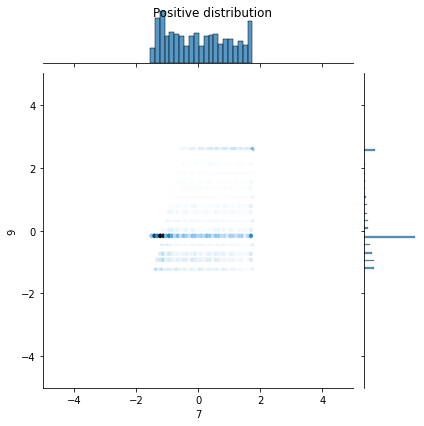

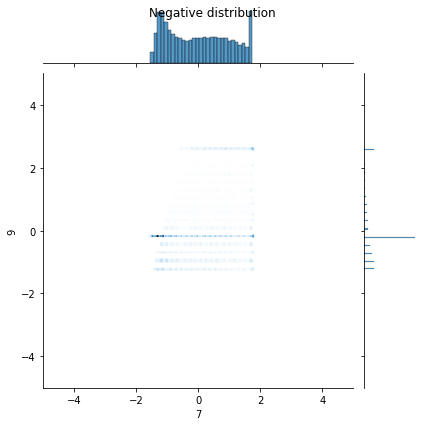

In [291]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(pos_df[7], pos_df[9],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df[7], neg_df[9],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

In [332]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(12,activation  ="relu"),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(12,activation  ="relu"),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(12,activation  ="relu"),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(8,activation  ="relu"),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(4,activation  ="relu"),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [333]:
EPOCHS = 100
BATCH_SIZE = 128

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=25,
    mode='max',
    restore_best_weights=True)

In [334]:
model = make_model()
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_137 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_97 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_138 (Dense)            (None, 12)                204       
_________________________________________________________________
dropout_98 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_139 (Dense)            (None, 12)                156       
_________________________________________________________________
dropout_99 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_140 (Dense)            (None, 12)              

In [335]:
model.predict(train_features[:10])

array([[0.5196365 ],
       [0.5166676 ],
       [0.5080648 ],
       [0.512955  ],
       [0.5209658 ],
       [0.49857157],
       [0.5307409 ],
       [0.51810557],
       [0.50818163],
       [0.5144789 ]], dtype=float32)

In [296]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.9664


In [297]:
initial_bias = np.log([pos/neg])
initial_bias

array([-1.1529683])

In [298]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.2524963 ],
       [0.272869  ],
       [0.28795308],
       [0.26395112],
       [0.3001739 ],
       [0.26966152],
       [0.29940987],
       [0.2739531 ],
       [0.27824718],
       [0.2542472 ]], dtype=float32)

In [299]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.5592


In [300]:
import os
import tempfile


In [301]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [302]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [303]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [304]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

In [305]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [306]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

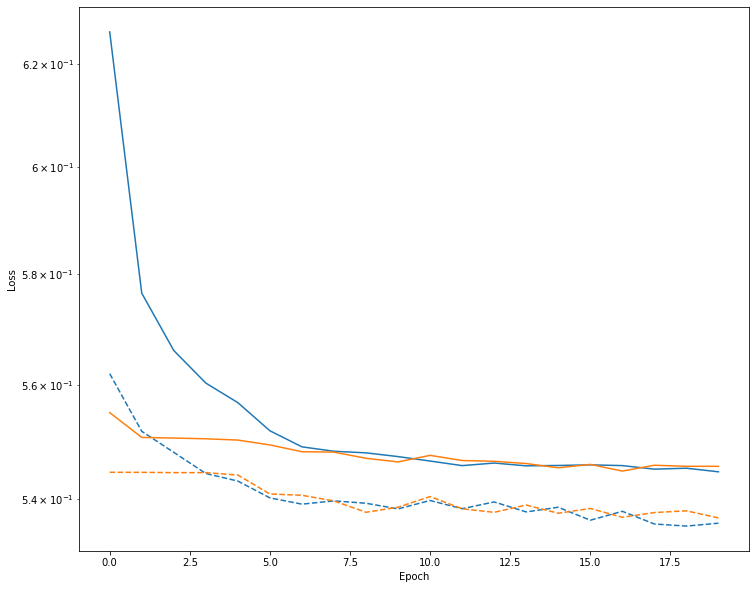

In [307]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [308]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
322/322 [==============================] - 4s 5ms/step - loss: 0.5582 - tp: 40.2415 - fp: 140.5820 - tn: 19168.6192 - fn: 5966.1424 - accuracy: 0.7585 - precision: 0.2224 - recall: 0.0082 - auc: 0.5168 - val_loss: 0.5447 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 3506.0000 - val_fn: 1074.0000 - val_accuracy: 0.7655 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5001
Epoch 2/100
322/322 [==============================] - 1s 3ms/step - loss: 0.5451 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 15804.4830 - fn: 4931.1022 - accuracy: 0.7651 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5037 - val_loss: 0.5448 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 3506.0000 - val_fn: 1074.0000 - val_accuracy: 0.7655 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5021
Epoch 3/100
322/322 [==============================] - 1s 3ms/step - loss: 0.5479 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 15806.6625 - fn: 4928.9226 - accuracy: 0.7627 -

In [311]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.4,.8])
    else:
      plt.ylim([0,1])

    plt.legend()

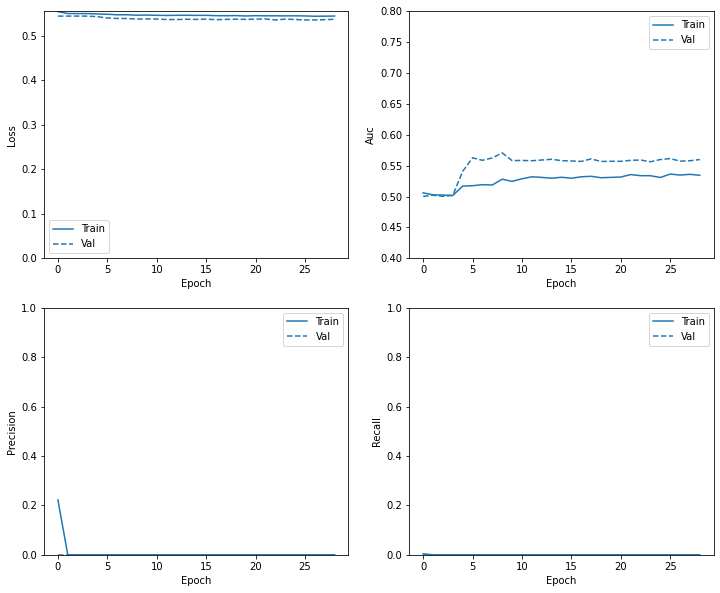

In [312]:
plot_metrics(baseline_history)

In [313]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [314]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

In [315]:
from sklearn.metrics import confusion_matrix

loss :  0.5546054244041443
tp :  0.0
fp :  0.0
tn :  3826.0
fn :  1263.0
accuracy :  0.7518176436424255
precision :  0.0
recall :  0.0
auc :  0.5477893948554993

Legitimate Transactions Detected (True Negatives):  3826
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  1263
Fraudulent Transactions Detected (True Positives):  0
Total Fraudulent Transactions:  1263


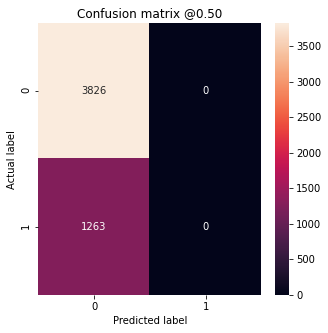

In [316]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [323]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100])
  plt.ylim([10,80.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

In [324]:
import sklearn

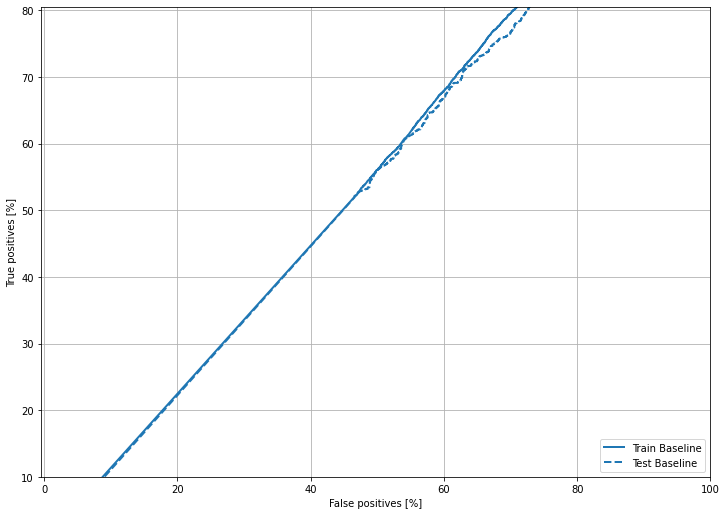

In [325]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [326]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.66
Weight for class 1: 2.08


In [327]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=128,
    epochs=EPOCHS,
    
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/100
322/322 [==============================] - 4s 6ms/step - loss: 0.8031 - tp: 403.1331 - fp: 1281.8452 - tn: 18310.5542 - fn: 5829.0526 - accuracy: 0.7287 - precision: 0.2391 - recall: 0.0554 - auc: 0.5045 - val_loss: 0.6051 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 3506.0000 - val_fn: 1074.0000 - val_accuracy: 0.7655 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5140
Epoch 2/100
322/322 [==============================] - 1s 3ms/step - loss: 0.7332 - tp: 879.3901 - fp: 3018.2074 - tn: 12749.1176 - fn: 4088.8700 - accuracy: 0.6587 - precision: 0.2240 - recall: 0.1719 - auc: 0.4922 - val_loss: 0.6316 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 3506.0000 - val_fn: 1074.0000 - val_accuracy: 0.7655 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5235
Epoch 3/100
322/322 [==============================] - 1s 3ms/step - loss: 0.7155 - tp: 1183.1548 - fp: 3801.1455 - tn: 11953.0588 - fn: 3798.2260 - accuracy: 0.6351 - precision:

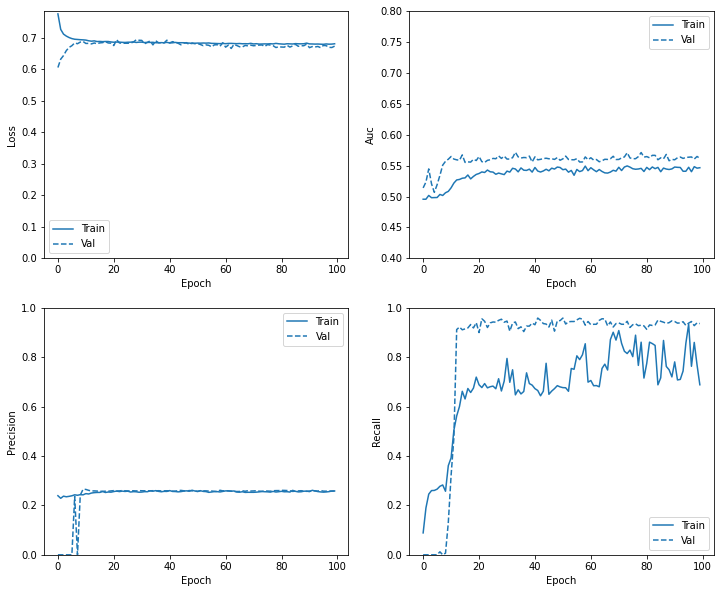

In [328]:
plot_metrics(weighted_history)

In [329]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.6728733777999878
tp :  1160.0
fp :  3188.0
tn :  638.0
fn :  103.0
accuracy :  0.35331106185913086
precision :  0.2667893171310425
recall :  0.9184481501579285
auc :  0.5517199635505676

Legitimate Transactions Detected (True Negatives):  638
Legitimate Transactions Incorrectly Detected (False Positives):  3188
Fraudulent Transactions Missed (False Negatives):  103
Fraudulent Transactions Detected (True Positives):  1160
Total Fraudulent Transactions:  1263


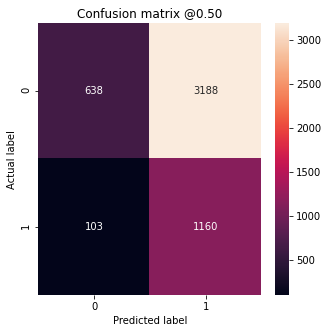

In [330]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

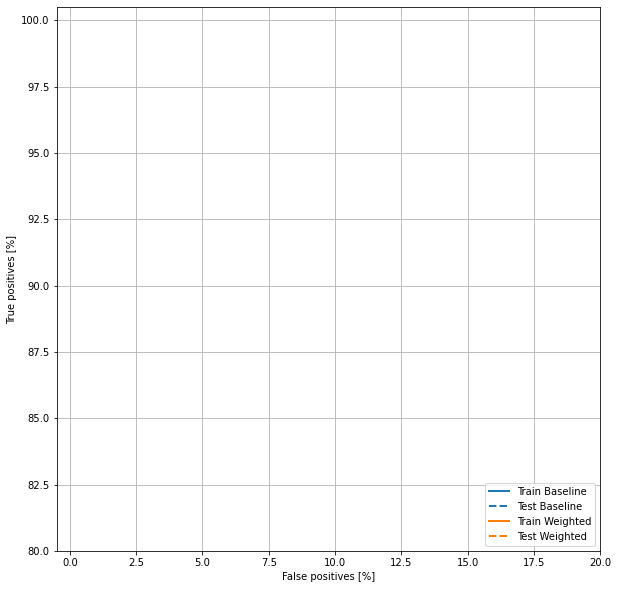

In [256]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [257]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [258]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

KeyError: ignored

In [59]:
df1.columns

Index(['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium'],
      dtype='object')

In [ ]:
#dealing with categorical variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2,3,6])], remainder='passthrough')
X = np.array(ct.fit_transform(df1))
X_11=X
X_t = np.array(ct.transform(df2))

In [61]:
print(X.shape)
X[1]

(50882, 15)


array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
       4.000e+00, 1.117e+03, 7.500e+01, 2.200e+01, 2.000e+00, 8.500e+00,
       2.000e+00, 2.200e+01, 3.051e+04])

In [62]:
print(X_t.shape)
X_t[1]

(21805, 15)


array([1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       1.00000e+00, 3.00000e+00, 7.00000e+00, 6.90000e+01, 6.80000e+01,
       1.00000e+00, 3.00000e+00, 3.00000e+00, 1.80000e+01, 3.22048e+04])

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm  =MinMaxScaler()
X_train[:,16:] = mm.fit_transform(X_train[:,16:])
X_test[:,16:] = mm.transform(X_test[:,16:])
#X_t[:,6:] = sc.transform(X_t[:,6:])

In [ ]:
X_t[:,16:] = mm.transform(X_t[:,16:])

In [ ]:
X_train[1]

array([1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.08571429, 0.18601647, 0.22807018, 0.25423729,
       0.4       , 0.66666667, 0.42857143, 0.23794105])

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_t = sc.transform(X_t)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,6:] = sc.fit_transform(X_train[:,6:])
X_test[:,6:] = sc.transform(X_test[:,6:])
#X_t[:,6:] = sc.transform(X_t[:,6:])

In [ ]:
X_t[:,6:] = sc.transform(X_t[:,6:])

In [65]:
X_t[1]

array([ 0.90669693, -0.90669693, -1.97172889,  1.97172889, -2.23680071,
        2.23680071, -0.52380293, -1.21269832,  1.39371707,  1.45744058,
       -0.54315428, -0.72690473,  0.59925333,  0.45395264,  2.73371032])

In [ ]:
pca = PCA(n_components = 12)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_t = pca.transform(X_t)

In [ ]:
# training and testing

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
pred_prob1 = classifier.predict_proba(X_test)
accuracy_score(y_test, y_pred)

[[3785  102]
 [1163   39]]


0.751424641383376

In [ ]:
roc_score = roc_auc_score(y_test,y_pred, average='micro')
print(roc_score)

0.5031023031248408


In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(scale_pos_weight=3)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2178 1709]
 [ 479  723]]


0.5700530556101395

In [ ]:
roc_score = roc_auc_score(y_test,y_pred, average='micro')
print(roc_score)

0.5809134034819764


In [ ]:
pred_prob1 = classifier.predict_proba(X_t)[:,1]
pred_prob1

array([0.52014345, 0.5251127 , 0.54684716, ..., 0.0070267 , 0.54690206,
       0.3766286 ], dtype=float32)

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

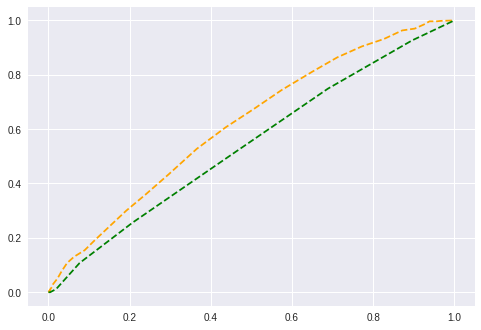

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 40, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
pred_prob2 = classifier.predict_proba(X_test)
accuracy_score(y_test, y_pred)

[[3886    1]
 [1202    0]]


0.7636077814894872

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


In [66]:
initial_bias = np.log([pos/neg])
initial_bias

array([-1.1529683])

In [67]:
import tensorflow as tf
from tensorflow import keras

In [68]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=12, activation='tanh'))
ann.add(tf.keras.layers.Dense(units=8, activation='tanh'))
ann.add(tf.keras.layers.Dense(units=6, activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.summary()

In [74]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop


In [76]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

In [75]:
ann.compile(optimizer = Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = METRICS)

In [72]:
METRICS = [ 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc')
]


In [ ]:
X_train[1]

array([-0.7387942 , -0.60857413, -1.84014223,  0.56183023, -1.61669309,
       -0.50782946,  0.32451056, -0.5461423 ,  0.21894095, -0.1466391 ,
        0.29063443,  0.03748724])

In [77]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100,class_weight=class_weight)

Epoch 1/100
1432/1432 [==============================] - 5s 2ms/step - loss: 0.6957 - accuracy: 0.3850 - tn: 6041.0537 - fn: 1743.2687 - precision: 0.2499 - recall: 0.7594 - auc: 0.5087
Epoch 2/100
1432/1432 [==============================] - 3s 2ms/step - loss: 0.6878 - accuracy: 0.3891 - tn: 4246.3119 - fn: 824.5052 - precision: 0.2636 - recall: 0.8488 - auc: 0.5497
Epoch 3/100
1432/1432 [==============================] - 3s 2ms/step - loss: 0.6811 - accuracy: 0.3953 - tn: 4440.9798 - fn: 831.5017 - precision: 0.2615 - recall: 0.8463 - auc: 0.5528
Epoch 4/100
1432/1432 [==============================] - 3s 2ms/step - loss: 0.6823 - accuracy: 0.3982 - tn: 4526.9177 - fn: 855.8772 - precision: 0.2643 - recall: 0.8449 - auc: 0.5524
Epoch 5/100
1432/1432 [==============================] - 3s 2ms/step - loss: 0.6810 - accuracy: 0.3908 - tn: 4138.3161 - fn: 720.1752 - precision: 0.2669 - recall: 0.8712 - auc: 0.5563
Epoch 6/100
1432/1432 [==============================] - 3s 2ms/step - los

In [79]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)*1
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [78]:
pred_prob1 = ann.predict_proba(X_t)
pred_prob1

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[0.55814546],
       [0.5581954 ],
       [0.5543182 ],
       ...,
       [0.13234347],
       [0.5324693 ],
       [0.25628895]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3886    1]
 [1202    0]]


0.7636077814894872

In [80]:
roc_score = roc_auc_score(y_test,y_pred, average='micro')
print(roc_score)

0.5550150743529672


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test,y_pred)

0.0

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight='balanced',penalty="l2",max_iter=500)
lr.fit(X_train, y_train)

# Predicting on the test data


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_test = lr.predict(X_test)
print(pred_test)

#Calculating and printing the f1 score 
#f1_test = f1_score(y_test, pred_test)
#print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
confusion_matrix(y_test, pred_test)

[1 1 1 ... 1 0 0]


array([[1637, 2250],
       [ 404,  798]])

In [ ]:
roc_score = roc_auc_score(y_test,pred_test)
print(roc_score)

0.5425204626368795


In [ ]:
pred_prob1 = lr.predict_proba(X_t)[:,1]
pred_prob1

array([0.36997071, 0.50830944, 0.50619787, ..., 0.32607136, 0.5357957 ,
       0.35563597])

In [ ]:
y_pred_ = lr.predict(X_t)
y_pred_ = (y_pred_ > 0.5)

ValueError: ignored

In [ ]:
confusion_matrix(y_test, y_pred_)

ValueError: ignored

In [ ]:
#y_pred_ = y_pred_*1
y_pred_1 = pd.DataFrame(pred_prob1)
y_pred_1.shape

(21805, 1)

In [ ]:
data = [df_f,y_pred_1]
headers = ["ID","Response"]

In [ ]:
df3 = pd.concat(data, axis=1, keys=None)

In [ ]:
df3.columns = ["ID","Response"]
df3.set_index("ID",inplace=True)
df3.head()

,Response
ID,
50883,0.520143
50884,0.525113
50885,0.546847
50886,0.465066
50887,0.510144


In [ ]:
df3.shape

(21805, 1)

In [ ]:
df3.to_csv("response_10.csv")